In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
from pandas import Series, DataFrame
from sklearn import tree


# Import and Preview

In [2]:
fraud = pd.read_csv('fraud_data.csv')
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Explore

Check for missing values in data set

In [4]:
print(fraud.isna().sum())
print(fraud.isnull().any().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
0


No null and no NaN values in set

In [5]:
fraud.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

Check basic summary stats

In [6]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
pd.set_option('display.max_rows', None)
correct_flag = fraud.loc[(fraud['isFraud']==1) & (fraud['isFlaggedFraud']==1)]
print(correct_flag.sum())
print(correct_flag)

step                                                           8601
type              TRANSFERTRANSFERTRANSFERTRANSFERTRANSFERTRANSF...
amount                                                  7.77856e+07
nameOrig          C728984460C1100582606C1035541766C908544136C689...
oldbalanceOrg                                           1.25086e+08
newbalanceOrig                                          1.25086e+08
nameDest          C639921569C1147517658C1100697970C891140444C139...
oldbalanceDest                                                    0
newbalanceDest                                                    0
isFraud                                                          16
isFlaggedFraud                                                   16
dtype: object
         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.

In [8]:
pd.set_option('display.max_rows', None)
flags = fraud.loc[(fraud['isFlaggedFraud']==1)]
print(flags.sum())
print(flags)

step                                                           8601
type              TRANSFERTRANSFERTRANSFERTRANSFERTRANSFERTRANSF...
amount                                                  7.77856e+07
nameOrig          C728984460C1100582606C1035541766C908544136C689...
oldbalanceOrg                                           1.25086e+08
newbalanceOrig                                          1.25086e+08
nameDest          C639921569C1147517658C1100697970C891140444C139...
oldbalanceDest                                                    0
newbalanceDest                                                    0
isFraud                                                          16
isFlaggedFraud                                                   16
dtype: object
         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.

# Visualize

In [9]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

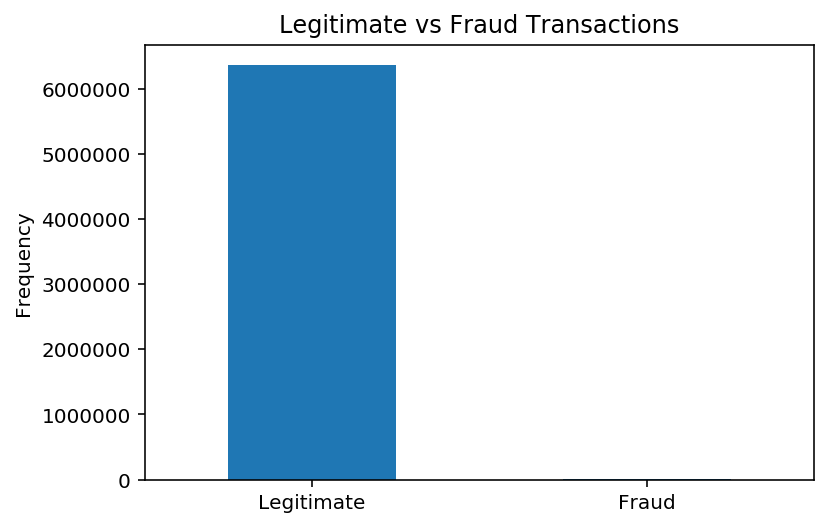

In [10]:
LABELS = ["Legitimate", "Fraud"]
count_classes = pd.value_counts(fraud['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Legitimate vs Fraud Transactions")
plt.xticks(range(2), LABELS)
# plt.xlabel("")
plt.ylabel("Frequency");


In [11]:
# print(f"Number of transactions analyzed: {fraud[]})
print(f"Number of actual fraud cases: {fraud['isFraud'].sum()}")
print(f"Number of transactions flagged as fraud: {fraud['isFlaggedFraud'].sum()}")
print(f"only {round((fraud['isFlaggedFraud'].sum())/(fraud['isFraud'].sum()),3)*100}% of trasactions are being caught")

Number of actual fraud cases: 8213
Number of transactions flagged as fraud: 16
only 0.2% of trasactions are being caught


In [12]:
# frauds = fraud[fraud.isFraud == 1]
# legitimate = fraud[fraud.isFraud == 0]

In [13]:
fraud_amt = fraud.loc[(fraud['isFraud'] == 1) & 
                         (fraud['amount'])]
frauds = fraud.loc[(fraud['isFraud'] == 1)]
legit = fraud.loc[(fraud['isFraud']== 0)]

In [14]:
fraud_amt['amount'].describe()

count    8.197000e+03
mean     1.470833e+06
std      2.405723e+06
min      6.380000e+01
25%      1.275643e+05
50%      4.422902e+05
75%      1.525742e+06
max      1.000000e+07
Name: amount, dtype: float64

## Distribution of fraud amounts

In [15]:
total_lost = round(fraud_amt['amount'].sum(),2)
total_cases = frauds['isFraud'].sum()
total_legit = fraud.step.count()-total_cases
print(f"Toal amount lost to fraud: ${total_lost}")
print(f"Total cases: {total_cases}")
print(f"total legit trans: {total_legit}")

Toal amount lost to fraud: $12056415427.84
Total cases: 8213
total legit trans: 6354407


(array([3924., 1172.,  688.,  436.,  297.,  260.,  177.,  129.,  116.,
          88.,   66.,   72.,   60.,   48.,   45.,   50.,   42.,   34.,
          51.,   30.,   28.,   24.,   30.,   23.,  307.]),
 array([6.38000000e+01, 4.00061248e+05, 8.00058696e+05, 1.20005614e+06,
        1.60005359e+06, 2.00005104e+06, 2.40004849e+06, 2.80004594e+06,
        3.20004338e+06, 3.60004083e+06, 4.00003828e+06, 4.40003573e+06,
        4.80003318e+06, 5.20003062e+06, 5.60002807e+06, 6.00002552e+06,
        6.40002297e+06, 6.80002042e+06, 7.20001786e+06, 7.60001531e+06,
        8.00001276e+06, 8.40001021e+06, 8.80000766e+06, 9.20000510e+06,
        9.60000255e+06, 1.00000000e+07]),
 <a list of 25 Patch objects>)

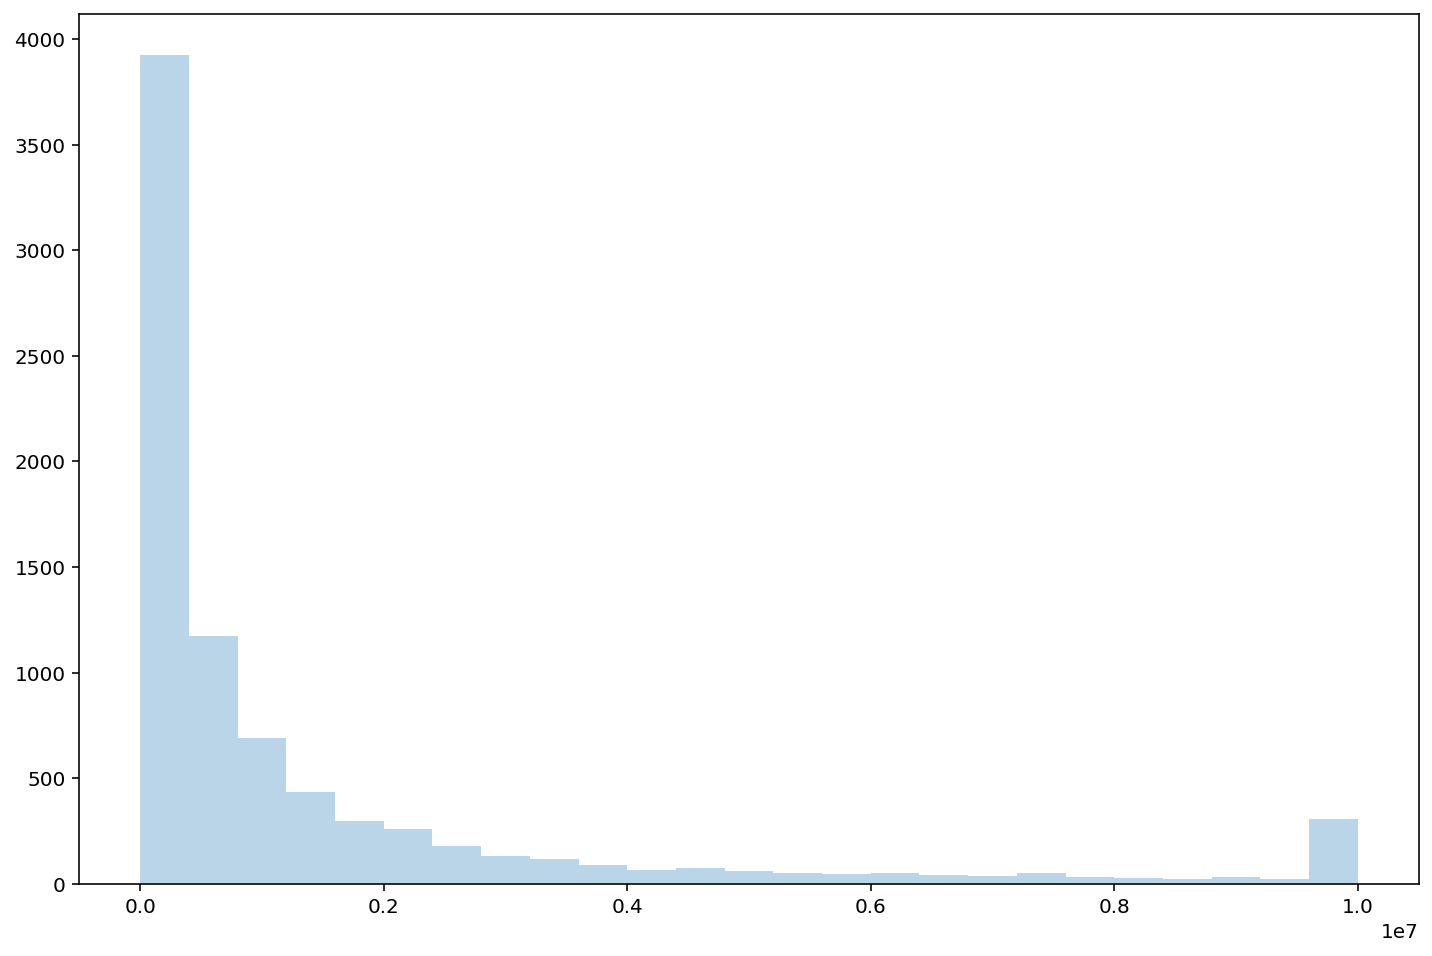

In [16]:
fig=plt.figure(figsize=(12,8))
plt.hist(fraud_amt['amount'],bins=25, alpha=0.3)

The majority of fraud is occuring in the amounts between 0 and 2 million.  Need to examine that range.  However, the spike at the far right end indicates that while still small in frequency by comparison, The amount of money lost in that bin is significant.

#### Greater than 8mil

Total money lost in this range: 3988961407.97
Proportion to total cases: 5.02%
proportion to total($): 33.09%


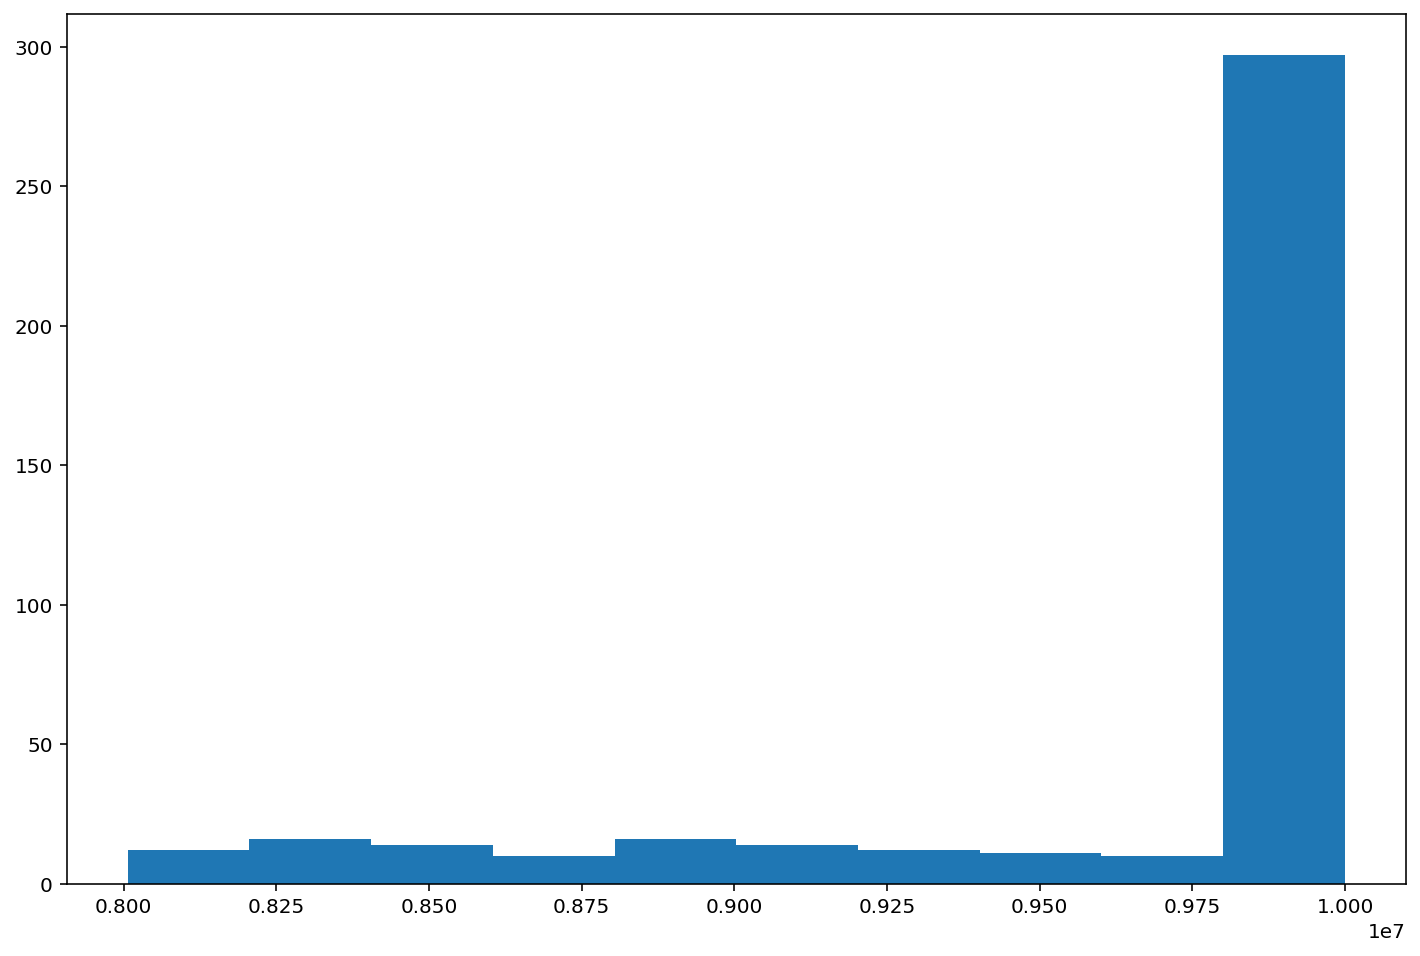

In [17]:
fig=plt.figure(figsize=(12,8))
majority_amt7 = fraud_amt.loc[(fraud_amt['amount'] > 8000000)] 
plt.hist(majority_amt7['amount'])
money_lost = majority_amt7['amount'].sum()
cases1 = majority_amt7['isFraud'].sum()*100
proportion_cases = round((cases1/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f71534b5280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f71534b5880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f71534b5250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7153445250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f71534b51f0>],
 'means': []}

<Figure size 864x576 with 0 Axes>

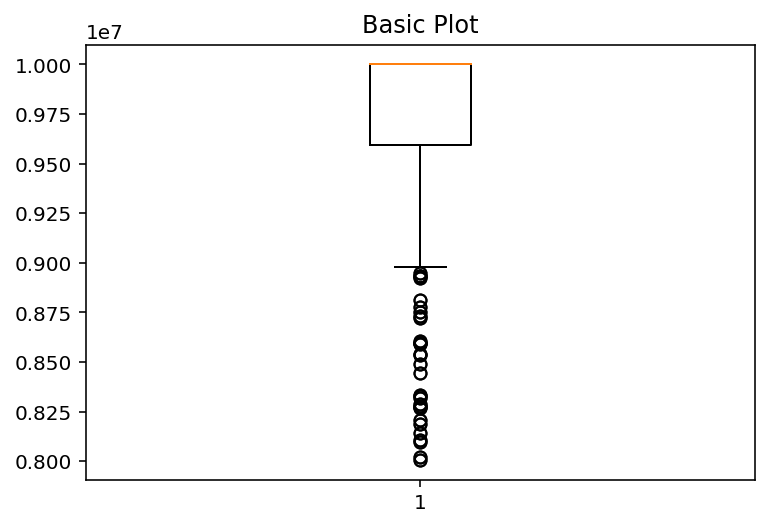

In [18]:
fig=plt.figure(figsize=(12,8))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(majority_amt7['amount'])

#### Less than 2mil

Total money lost in this range: 3054292829.18
Proportion to total cases: 79.35%
proportion to total($): 25.33%


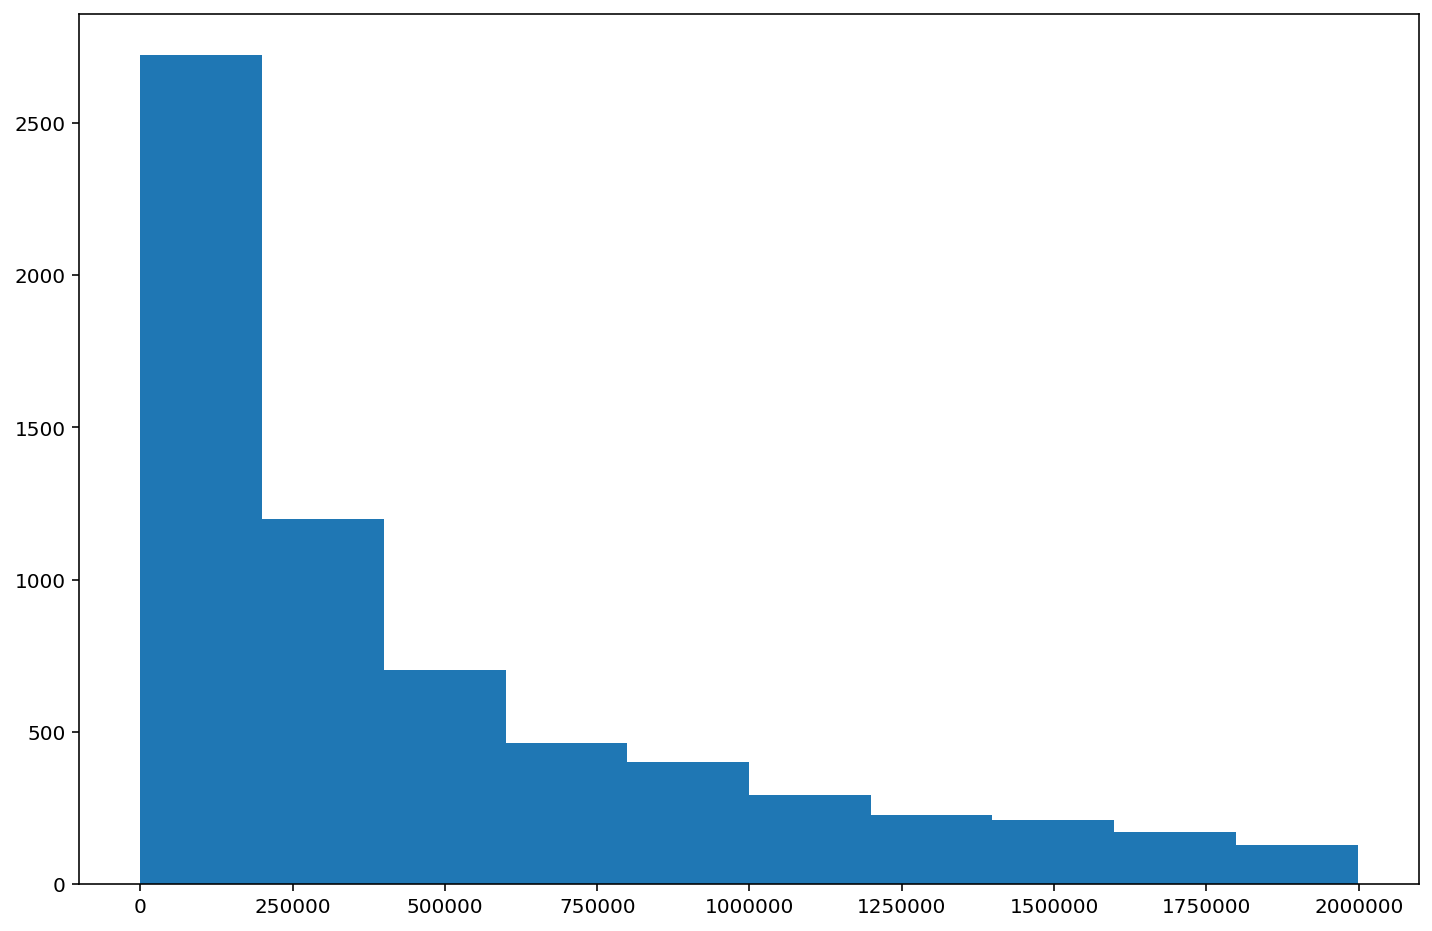

In [19]:
fig=plt.figure(figsize=(12,8))
majority_amt = fraud_amt.loc[(fraud_amt['amount'] < 2000000)] 
plt.hist(majority_amt['amount'])
money_lost = majority_amt['amount'].sum()
cases2 = majority_amt['isFraud'].sum()*100
proportion_cases = round((cases2/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

#### Less than 500000

Total money lost in this range: 754389939.72
Proportion to total cases: 52.76%
proportion to total($): 6.26%


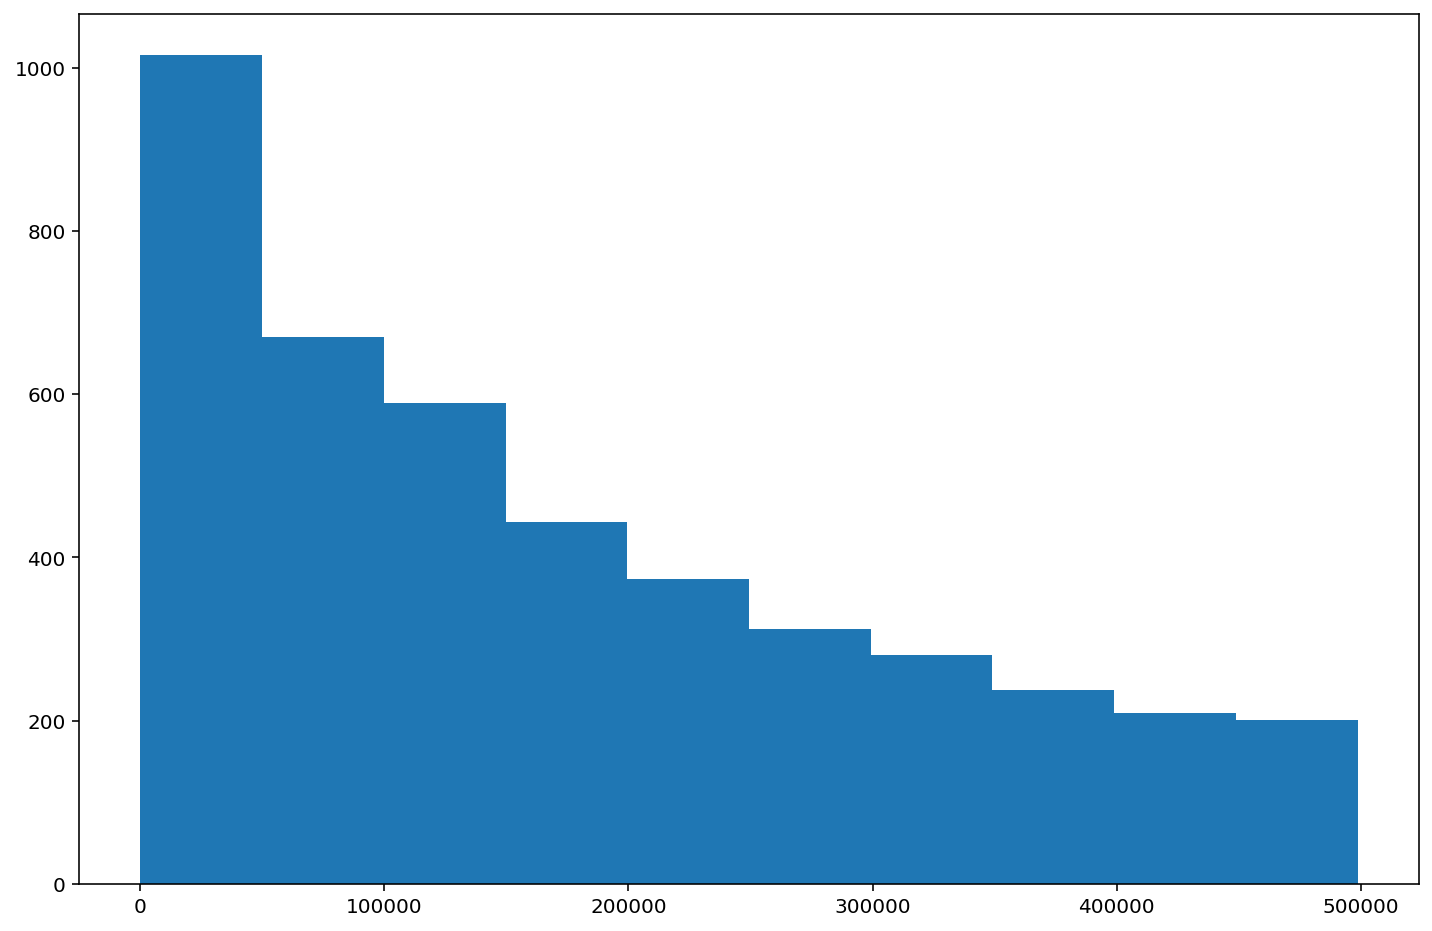

In [20]:
fig=plt.figure(figsize=(12,8))
majority_amt2 = fraud_amt.loc[(fraud_amt['amount'] < 500000)] 
plt.hist(majority_amt2['amount'])
money_lost = majority_amt2['amount'].sum()
cases3 = majority_amt2['isFraud'].sum()*100
proportion_cases = round((cases3/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

#### Less than 200000

Total money lost in this range: 73020052.09
Proportion to total cases: 20.59%
proportion to total($): 0.61%


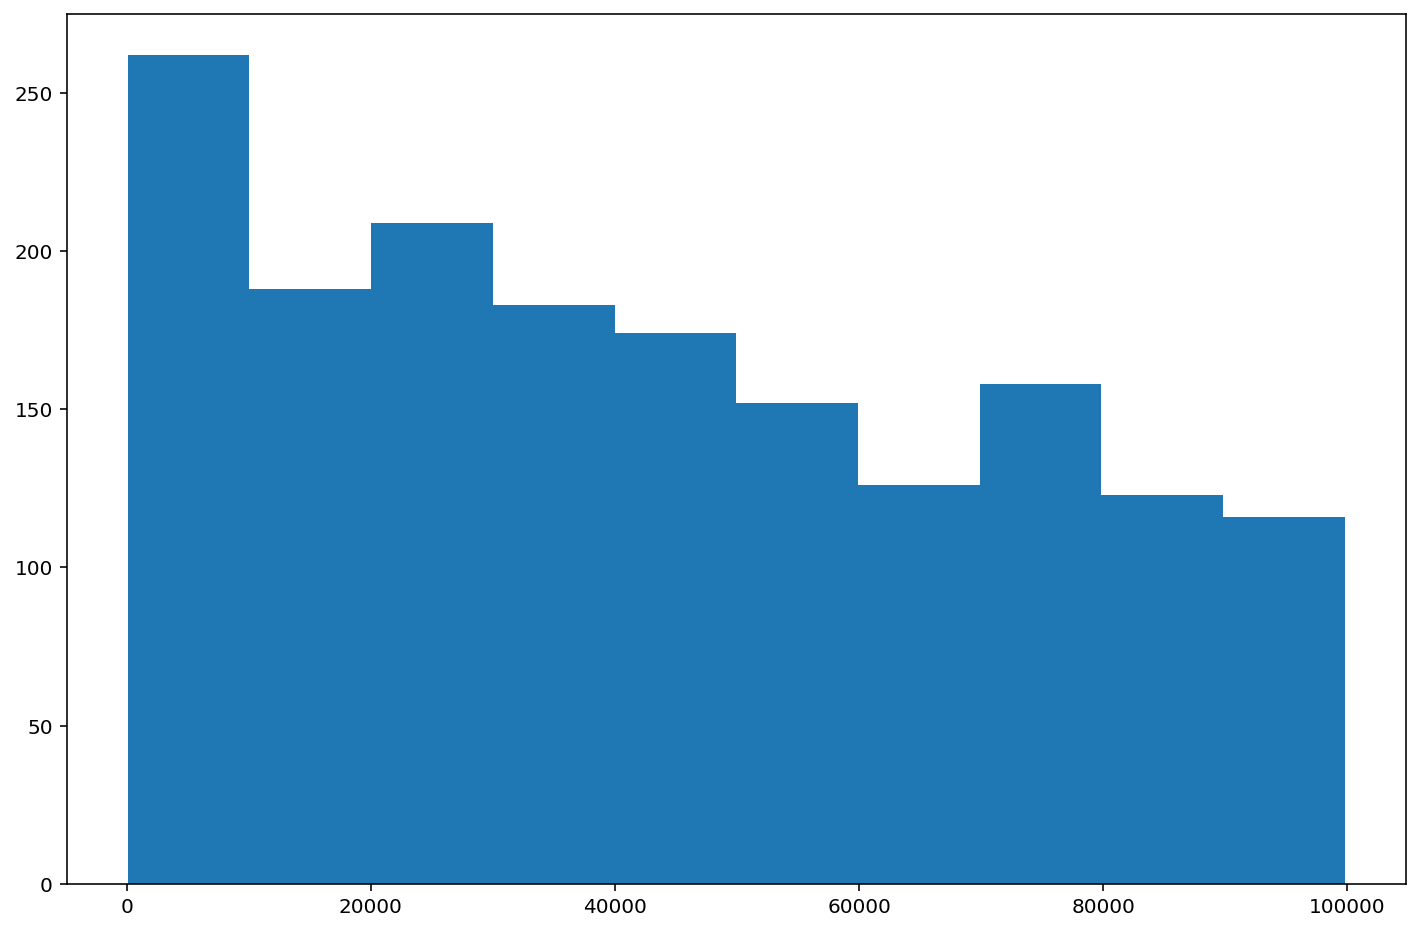

In [21]:
fig=plt.figure(figsize=(12,8))
majority_amt3 = fraud_amt.loc[(fraud_amt['amount'] < 100000)] 
plt.hist(majority_amt3['amount'])
money_lost = majority_amt3['amount'].sum()
cases3 = majority_amt3['isFraud'].sum()*100
proportion_cases = round((cases3/total_cases),2)
proportion = round((money_lost/total_lost*100),2) 
print(f"Total money lost in this range: {money_lost}")
print(f"Proportion to total cases: {proportion_cases}%")
print(f"proportion to total($): {proportion}%")

#### Less than 20k

In [22]:
# majority_amt4 = fraud_amt.loc[(fraud_amt['amount'] < 20000)] 
# plt.hist(majority_amt4['amount'])
# money_lost = majority_amt4['amount'].sum()
# proportion = round((money_lost/total_lost*100),2) 
# print(f"Total money lost in this range: {money_lost}")
# print(f"proportion to total: {proportion}%")

#### less than 5k

In [23]:
# majority_amt5 = fraud_amt.loc[(fraud_amt['amount'] < 5000)] 
# plt.hist(majority_amt5['amount'])
# money_lost = majority_amt5['amount'].sum()
# proportion = round((money_lost/total_lost*100),2) 
# print(f"Total money lost in this range: {money_lost}")
# print(f"proportion to total: {proportion}%")

#### Less than 1k

In [24]:
# majority_amt6 = fraud_amt.loc[(fraud_amt['amount'] < 1000)] 
# plt.hist(majority_amt6['amount'])
# money_lost = majority_amt6['amount'].sum()
# proportion = round((money_lost/total_lost*100),2) 
# print(f"Total money lost in this range: {money_lost}")
# print(f"proportion to total: {proportion}%")

## Times of day

#### TODO: Also convert for day of week, and maybe week of month.  Dataset is for one month only

In [25]:
frauds = frauds.assign(time = frauds['step']%24) 

In [26]:
frauds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,1
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,1
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,1
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,1


(array([1030.,  600.,  724., 1037.,  699.,  685., 1039.,  696.,  682.,
        1021.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

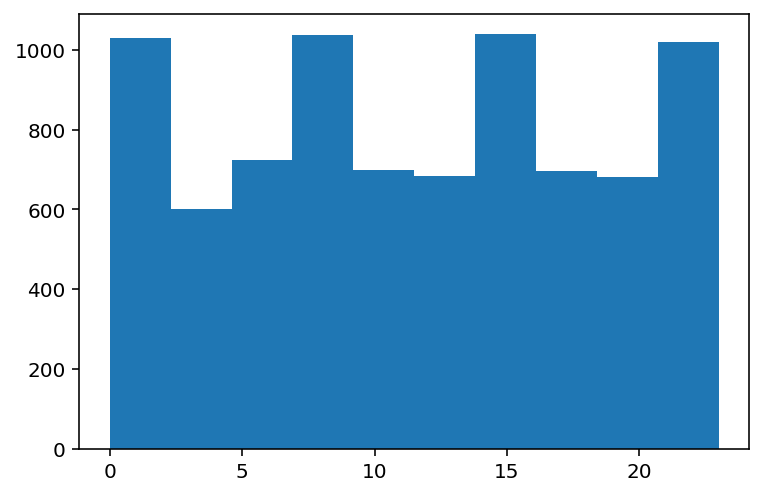

In [27]:
plt.hist(frauds['time'])

In [28]:
legit = legit.assign(time = legit['step']%24)

In [29]:
legit.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,1
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,1


(array([ 106686.,    2648.,    4337.,  318384.,  871022.,  951207.,
        1296912., 1019754., 1200860.,  582597.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

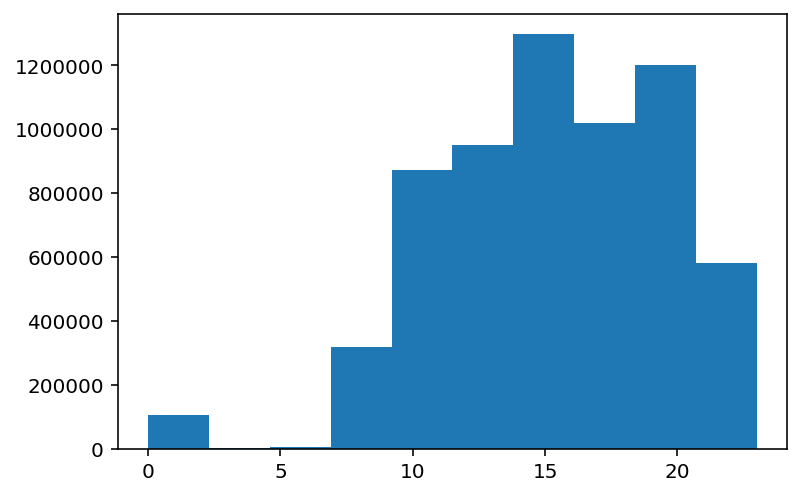

In [30]:
plt.hist(legit['time'])

In [31]:
# fraud_time ={}
# for i in range(0,total_cases,1):
#     time = frauds.iloc[i].time
#     if time not in fraud_time:
#         fraud_time[time] = 1
#     else:
#         fraud_time[time] += 1

In [32]:
# legit_time={}        
# for i in range(0,total_legit,1):
#     time = legit.iloc[i].time
#     if time not in legit_time:
#         legit_time[time] = 1        
#     else:
#         legit_time[time] += 1

#### Frequency of fraud transactions at time intervals

In [33]:
# plt.bar(fraud_time.keys(), fraud_time.values())

Looks like no correlation between time of day and fraud...



#### Frequency of legit transactions at time intervals

In [34]:
# plt.bar(legit_time.keys(), legit_time.values())

...but there's definately time's of day for 'normal' business

## Confusion Matrix

In [35]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

[[     16    8197]
 [      0 6354407]]
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      8213
           0       1.00      1.00      1.00   6354407

    accuracy                           1.00   6362620
   macro avg       1.00      0.50      0.50   6362620
weighted avg       1.00      1.00      1.00   6362620



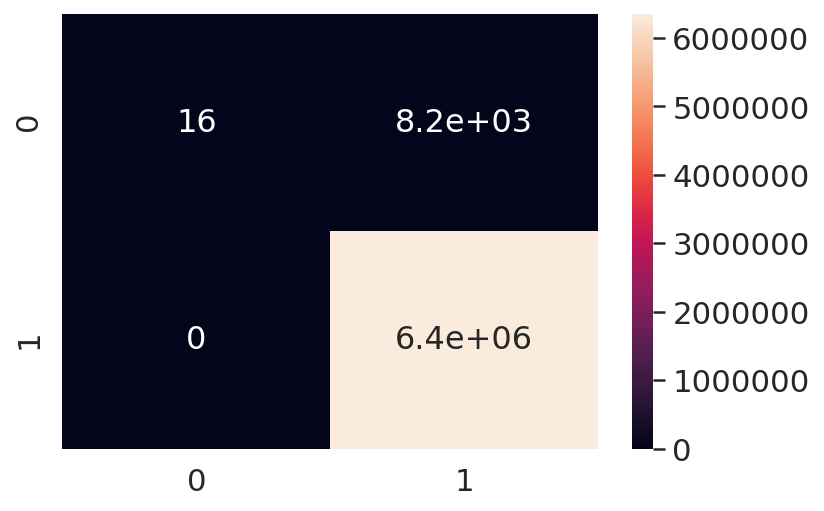

In [36]:
# Predicted values
y_pred = fraud.isFlaggedFraud
# Actual values
y_act = fraud.isFraud
# plt.show()
print(metrics.confusion_matrix(y_act, y_pred, labels=[1, 0]))
print(metrics.classification_report(y_act, y_pred, labels=[1, 0]))
# metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
# metrics.classification_report(y_act, y_pred, labels=[1, 0])
g_conf = metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
df_g_conf = pd.DataFrame(g_conf, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_g_conf, annot=True, annot_kws={"size": 16})

plt.show()

## Decision Tree

In [37]:
# fraud['type'] = fraud['type'].map({'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2})

In [38]:
# X = fraud.drop(columns=['isFraud', 'nameOrig', 'nameDest'])

In [39]:
# y = fraud['isFraud']

In [40]:
# model = tree.DecisionTreeClassifier(max_depth=5)

## Logistic Regression

In [41]:
from scipy.stats import norm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [58]:
fraud = fraud.assign(time = fraud['step']%24)

In [51]:
X = fraud[['time', 'amount']]
y = fraud['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


model=LogisticRegression()
model.fit(X_train, y_train)

# check the accuracy on the training set
print("accuracy on the training set:",model.score(X_train, y_train))

# check the accuracy on the test dataset
print("accuracy on the testing set:",model.score(X_test, y_test))

# traina = train[train['isFraud']=='1']
# trainb = train[train['isFraud']=='0']
# plt.plot(traina['x'], traina['y'],'bs', label='is fraud')
# plt.plot(trainb['x'], trainb['y'],'r^', label='not fraud')
# plt.legend()
# plt.title('Training Data')
# plt.show()

accuracy on the training set: 0.9973154771748705
accuracy on the testing set: 0.9973314790692801


Confusion Matrix on train data
[[4251349    5404]
 [   6040     162]]
              precision    recall  f1-score   support

           1       0.03      0.03      0.03      6202
           0       1.00      1.00      1.00   4256753

    accuracy                           1.00   4262955
   macro avg       0.51      0.51      0.51   4262955
weighted avg       1.00      1.00      1.00   4262955



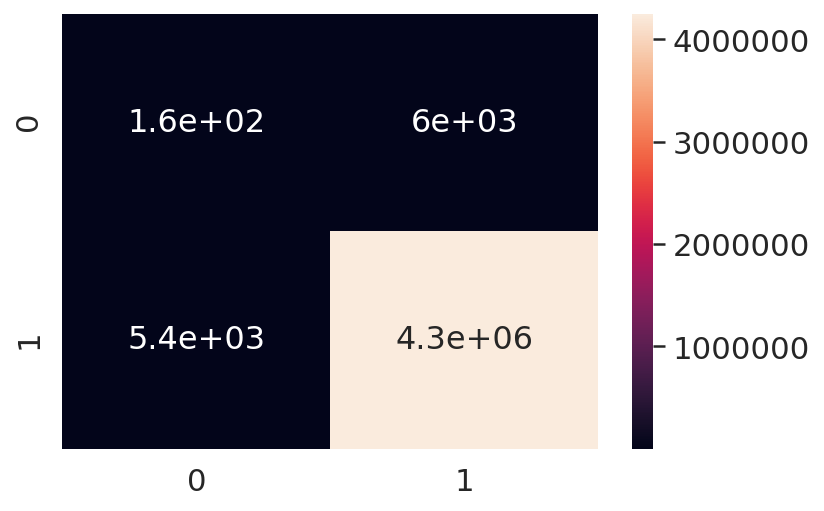

Confusion Matrix on test data
[[2093988    2573]
 [   3030      74]]
              precision    recall  f1-score   support

           1       0.03      0.03      0.03      6202
           0       1.00      1.00      1.00   4256753

    accuracy                           1.00   4262955
   macro avg       0.51      0.51      0.51   4262955
weighted avg       1.00      1.00      1.00   4262955



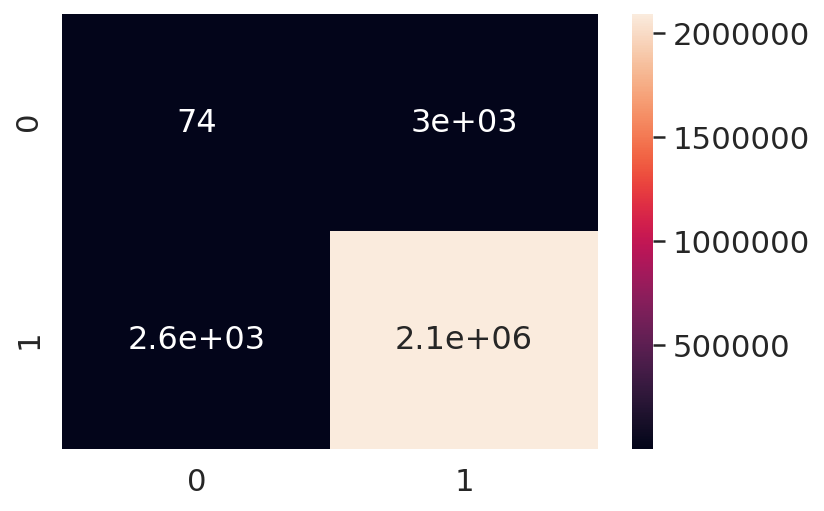

In [57]:
# Predicted values
y_pred = fraud.isFlaggedFraud
# Actual values
y_act = fraud.isFraud


# Predict class labels for the train set
predicted = model.predict(X_train)
# Confusion Matrix for train data
print('Confusion Matrix on train data')
print(metrics.confusion_matrix(predicted, y_train))
print(metrics.classification_report(predicted, y_train, labels=[1, 0]))
g_conf = metrics.confusion_matrix(predicted, y_train, labels=[1, 0])
df_g_conf = pd.DataFrame(g_conf, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_g_conf, annot=True, annot_kws={"size": 16})
plt.show()

# Predict class labels for the test dataset
predicted_test = model.predict(X_test)
# Confusion Matrix for test data
print('Confusion Matrix on test data')
print(metrics.confusion_matrix(predicted_test, y_test))
print(metrics.classification_report(predicted, y_train, labels=[1, 0]))
g_conf = metrics.confusion_matrix(predicted_test, y_test, labels=[1, 0])
df_g_conf = pd.DataFrame(g_conf, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_g_conf, annot=True, annot_kws={"size": 16})
plt.show()